# 4.3 Factor Analysis with Iris data using python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

In [2]:
# Load iris dataset
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Keep numeric columns
X = iris.select_dtypes(include=[np.number])

In [3]:
# Step 1: KMO and Bartlett's Test
kmo_all, kmo_model = calculate_kmo(X)
chi_square_value, p_value = calculate_bartlett_sphericity(X)
print(f"KMO: {kmo_model:.3f}  |  Bartlett's p-value: {p_value:.5f}")

KMO: 0.540  |  Bartlett's p-value: 0.00000


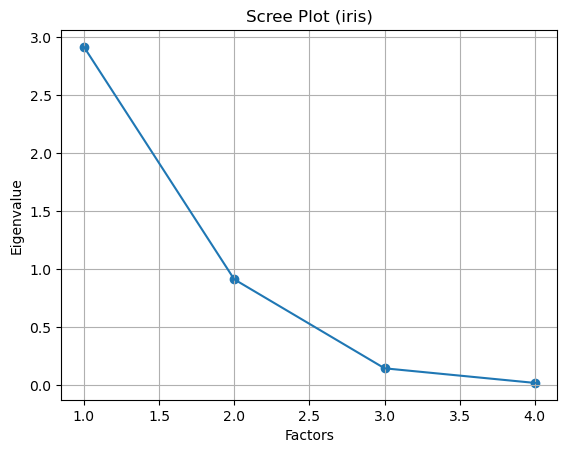

[2.91849782 0.91403047 0.14675688 0.02071484]


In [4]:
# Step 2: Scree Plot & Eigenvalues
fa = FactorAnalyzer(rotation=None)
fa.fit(X)
ev, v = fa.get_eigenvalues()

plt.scatter(range(1, X.shape[1] + 1), ev)
plt.plot(range(1, X.shape[1] + 1), ev)
plt.title("Scree Plot (iris)")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()


print(ev)

In [5]:
# Choose factors with eigenvalue > 1
n_factors = sum(ev > 1)
print(f"Suggested number of factors: {n_factors}")


Suggested number of factors: 1


In [6]:
# Step 3: Final Factor Analysis
fa_final = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa_final.fit(X)

C:\Users\USER OS\AppData\Roaming\Python\Python312\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


FactorAnalyzer(n_factors=1, rotation='varimax', rotation_kwargs={})

In [7]:
# Factor Loadings
loadings = pd.DataFrame(fa_final.loadings_, index=X.columns, 
                        columns=[f"Factor{i+1}" for i in range(n_factors)])
print("\nFactor Loadings:\n", loadings)


# Variance Explained
variance = pd.DataFrame({
    "SS Loadings": fa_final.get_factor_variance()[0],
    "Proportion Var": fa_final.get_factor_variance()[1],
    "Cumulative Var": fa_final.get_factor_variance()[2]
}, index=[f"Factor{i+1}" for i in range(n_factors)])
print("\nVariance Explained:\n", variance)


Factor Loadings:
                     Factor1
sepal length (cm) -0.822986
sepal width (cm)   0.334364
petal length (cm) -1.014525
petal width (cm)  -0.974734

Variance Explained:
          SS Loadings  Proportion Var  Cumulative Var
Factor1     2.768474        0.692119        0.692119


**Interpretation**

Factor Loadings:
* Factor 1: Strong negative loadings on petal length, petal width, sepal length and a smaller positive loading on sepal width. This factor mainly captures overall flower size, especially petal dimensions (larger petals = lower factor score here due to negative sign).

Variance Explained: Factor 1 alone explains 69.2% of the total variance, meaning a single underlying dimension (flower size) accounts for most of the differences among the iris samples.